In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

In [12]:
train_data_dir = r'cleaned_data/spectrogram_train_test/Train'
test_data_dir = 'cleaned_data/spectrogram_train_test/Test'
img_width, img_height = 336, 336

In [13]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32 
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        shuffle = True,
        class_mode='binary')

test_generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 958 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


In [14]:
# On définit l'architecture du modèle :

model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# On compile le modeles :

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# On affiche le model :

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 334, 334, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 334, 334, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 167, 167, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 165, 165, 32)      9248      
                                                                 
 activation_6 (Activation)   (None, 165, 165, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 82, 82, 32)       0         
 2D)                                                  

In [16]:
train_samples = 958 
test_samples = 344  

# On definit les parametres pour l'entrainement :
epochs = 100

# On definit les callbacks : 
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',patience = 5,restore_best_weights=True,),
]

In [17]:
historique = model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        callbacks = my_callbacks,
        validation_data = test_generator,
        validation_steps=test_samples // batch_size)

C:\Users\marti\AppData\Local\Temp\ipykernel_12024\2815768393.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  historique = model.fit_generator(


Epoch 1/100
29/29 [==============================] - 96s 3s/step - loss: 0.3118 - accuracy: 0.9050 - val_loss: 0.3095 - val_accuracy: 0.9094
Epoch 2/100
29/29 [==============================] - 94s 3s/step - loss: 0.2589 - accuracy: 0.9320 - val_loss: 0.3106 - val_accuracy: 0.9094
Epoch 3/100
29/29 [==============================] - 96s 3s/step - loss: 0.2796 - accuracy: 0.9298 - val_loss: 0.3064 - val_accuracy: 0.9187
Epoch 4/100
29/29 [==============================] - 96s 3s/step - loss: 0.2597 - accuracy: 0.9309 - val_loss: 0.2878 - val_accuracy: 0.9156
Epoch 5/100
29/29 [==============================] - 90s 3s/step - loss: 0.2512 - accuracy: 0.9352 - val_loss: 0.2868 - val_accuracy: 0.9156
Epoch 6/100
29/29 [==============================] - 92s 3s/step - loss: 0.2599 - accuracy: 0.9298 - val_loss: 0.3797 - val_accuracy: 0.9219
Epoch 7/100
29/29 [==============================] - 102s 3s/step - loss: 0.2698 - accuracy: 0.9320 - val_loss: 0.2855 - val_accuracy: 0.9156
Epoch 8/100


In [18]:
n_epochs = len(historique.history['accuracy'])
GenOptimale3 = n_epochs-10
print("La generation optimale est : ",GenOptimale3)
print("Avec une val_accuracy de : ",historique.history['accuracy'][GenOptimale3-1])

La generation optimale est :  1
Avec une val_accuracy de :  0.9049676060676575


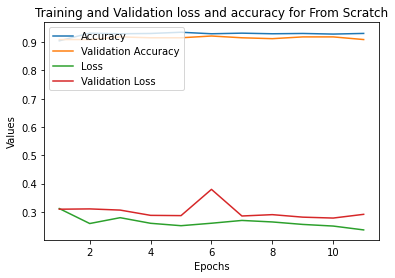

In [19]:
epochs = range(1,n_epochs + 1)
plt.plot(epochs, historique.history['accuracy'], label='Accuracy')
plt.plot(epochs, historique.history['val_accuracy'], label='Validation Accuracy')
plt.plot(epochs, historique.history['loss'], label='Loss')
plt.plot(epochs, historique.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation loss and accuracy for From Scratch')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()